Tommaso Peritore

In [29]:
#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import statsmodels.api as sm

#os
import os
#image
from PIL import Image
import imageio

#glob
import glob

#numpy
import numpy as np

from IPython.display import Image as IPImage

# Exercise 09

## The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the $N^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**Warm suggestion: by using the 1D representation** (but you can work with the representation you prefer or the one you are able to invent) ...

## 9.1


Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!
Apply your code to the optimization of a path among 

- 34 cities randomly placed **on** a circumference  
- 34 cities randomly placed **inside** a square  

Show your results via:

- a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm  
- a picture of the best path in cartesian coordinates  

# Solution

### The traveling salesman problem
The traveling salesman problem (TSP) is an optimization problem, consisting of a salesman and a set of $N$ cities with positions $\vec{c}_i$, which he wishes to visit one by one, starting from a fixed city and returning at the end of the trip to the same. The optimization tackles the minimization of the lenght of the whole trip.

With the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city $1$ to the $N^{th}$ city, the path that minimizes the length will be a certain permutation of the sequence of cities, i.e. the path for which the following loss/cost function is minimized:
$$
L^{(k)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^k
$$
with $k$ being the order of the norm used to calculate the distance between two cities (a parameter which our code will be able to take as input). 

To solve this optimization problem, we will be using the Genetic Algorithm (GA) which mimickes the process of natural selection by fitness. The algorithm starts with a population of individuals (possible solutions to the problem) and evolves them through new generations, applying genetic operators such as mutation and crossover, in order to find the best solution to the problem. A variety of mutation operators were constructed, each with its probability to be called, and a selection operator was implemented to choose the individuals to be evolved in the next generation. 

### Classes
The approach I took to solve this problem, which seemed the best fit, was class oriented. Here I will give an overview of the functioning of the code.

Our code will generate the positions of cities using two scenarios: either randomly on the unit circle or randomly inside a square of unitary side. This choice, together with all other parameters that the system requires will be taken from the input file `./8.1/INPUT/input.dat` in a fashion similar to the one provided for the NSL simulator. Here is what the file looks like

>TSP_TYPE	$\qquad\qquad$	0
><br>NORM_ORDER	$\qquad\,$ 2
><br>WEIGHT_POWER	$\quad\,\,$ 7
><br>N_CITIES	$\qquad\qquad\,$ 34
><br>N_INDIVIDUALS	$\quad\,\,\,$ 2000
><br>N_GENERATIONS	$\quad$ 500
><br>PROB_MUTATIONS $\,\,$ 5 0.7 0.06 0.1 0.06 0.6
><br>
><br>ENDINPUT

where meaning of each component will be explained gradually as each part of the code is introduced.

To define a city, I constructed the class `class City` which has substantially a single class member, an armadillo library vector `arma::vec _location_` and a method to modify this positiom `void set_location (vec location, int dimension)`. 

The other class needed to implement the Genetic algorithm was the `class TSP`, which has the following (notable) class members:

```cpp
int _n_cities; 
double _norm_order; 
double _weight_power; 
int _population_size;
int _tsp_type; 
int _n_generations; 
int _evolution_count=0; 
arma::Col<double> _prob_mutations; 

arma::Mat<double> _loss; 
arma::Mat<int> _population; 
arma::Mat<int> _new_generation; 
arma::field<City> _cities; 
```
The first group of variables are parameters which were, as said above, initialized through the input file. 
The `arma::field` is an armadillo library class which is a container for objects of the same type, in this case `City`. This allowed me to initialize my set of cities, each with their positions and an index (their index inside the field) and have it saved inside the system.
I took this approach so that each permutation of the sequence of cities could be described as a permutation of the indexes of the cities, which is a more efficient way to handle the problem as opposed to shuffling cities which carry their positions with them.

In fact, as could be seen above, the way I defined my population was through an armadillo matrix of integers where each column of the matrix is a member of the population, i.e. a permutation of the indexes of the cities, and obviously vertically we had an order sequence of the cities to visit in the trip.

### Loss and fitness evaluation
The loss function of a path was calculated using the norm of the difference between the positions of the cities, as described above. This was taken care of by the function
```cpp
double TSP :: loss_function(int i_travel) {
  double loss = 0.;
  for (int i_city = 0; i_city < _n_cities; i_city++)
    loss += distance(i_city, i_travel);  
	 
  return loss;
}
```
where the distance between two cities was calculated as
```cpp
double TSP :: distance(int i_city, int i_travel) {
  vec distance = _cities(_population.at(i_city, i_travel)).return_location() - 
                 _cities(_population.at(boundary_condition(i_city + 1), i_travel)).return_location();
  return arma::norm(distance, _norm_order);
}
```
Notice how the calculation of the distance exploits the norm function of the armadillo library, which operates on an armadillo vector and accepts as parameter the norm order, initialized as said above through the input file. In all of my simulations I used _norm_order $=2$, but the code is ready to handle any other norm.

In continuity with the use of matrices to handle the population, I also set up a loss matrix, where for each element of the population, the loss matrix had as first value the actual loss, and as second value its fitness. The matrix is the `arma::Mat<double> _loss` seen initialized in the previous section, and its first element is filled calling the `loss_function` for each element of the population (column of the population matrix).

The second element of the loss matrix, i.e. the fitness of the population element, was calculated using the function
```cpp
void TSP :: fitness_evaluation() {
  double loss_norm = 0; // normalization factor for the weights
  for (int i_travel = 0; i_travel < _population_size; i_travel++)
    loss_norm += pow(_loss.at(0, i_travel), -1.*_weight_power); 
    // sum of the inverse of the loss function
  for (int i_travel = 0; i_travel < _population_size; i_travel++){
    _loss.at(1, i_travel) = pow(_loss.at(0, i_travel), -1*_weight_power) / loss_norm;	
    // weight of the travel	
  }
  return;
}
```
which implements this formula for the fitness of the population element:
$$
f_i = 
\frac{L_i^{-w}}{\sum_{j=1}^{N} L_j^{-w}}
$$
where $L_i$ is the loss of the $i^{th}$ element of the population, $w$ is the weight power initialized through the input file, and $N$ is the number of elements in the population. This allowed me to tweak the weight power in order to sufficiently prioritize the better fit elements of the population. Furthermore, this calculation took into account the differences in the loss amongst the elements through the normalization factor `loss_norm`. After some testing, the weight power I chose was $7$.

Finally, the process of loss and the weight evaluation was done each time that a new generation was initialized, i.e. after each iteration of _evolution_. Now let's look at what made this evolution possible, the genetic operators.

### Evolution
The first step of evolution is procreation, i.e. somehow to make a baby from two parents. Here the process is of course simplified from how things work in nature.

First off, we need to chose two parents according to fitness using the second element of the _loss matrix, already evaluated. The choice is random but favors the better fit elements. 
<br>Once two parents have been chosen, they combine through crossover to make their offsprings. A random index is drawn from which to begin the crossover and from that index going forward, the cities indices are rearranged to appear in the order of the opposite parent. The resulting two children are then subject to mutations, applied by the following operators, each of which has its probability of being activated, as initialized in the input file. 

The mutations operators are:
1. `pair_permutation` - a pair of cities is chosen and their positions are swapped.
2. `block_shift` - a block of cities is chosen and shifted by a certain number of positions.
3. `block_permutation` - a block of cities is chosen and permuted with another block of cities.
4. `order_inversion` - a block of cities is chosen and the order of their appearance is inverted.
where of course every time some number of index has to be picked, we draw it at random. The probabilities for each mutation were tweaked, while the crossover had its fixed probability.

Finally, the two new children are saved in a _new_generation matrix, the process is repeated with the same set of parents, to progressively fill the new generation. Once it is ready, it completely substitutes the old one: this whole cycle is what is thought of as $1$ evolution. The total number of evolutions to be run is once again initialized through the input file, we ran ours with $500$ evolutions. At the end of each evolution cycle we output the best fit element of that population in order to keep track of the fitness of our population and look into the progressive improvement of the best trip.

### Results
Below I am showing the fittest element of the first generation and of the last, together with an animation of the whole process of evolution, both for the cities generated on the circle and inside the square.

In [30]:
# Defining functions to plot results

def open_data_generations (type) :
	# Path to the folder
	folder_path = "./9.1/OUTPUT/" + type 

	# Read the fittest.dat file and split it into generations
	with open(folder_path + "/fittest.dat", "r") as f:
		next(f) 	 # Skip the first line
		data = f.read().strip().split("\n\n")
	return data

def print_best_travel (type, gen, save_image) :

	folder_path = "./9.1/OUTPUT/" + type 

	# Load data from file for cities
	int_values, x_values, y_values = np.loadtxt("./9.1/OUTPUT/" + type + "/cities_details.dat", usecols=(0, 1, 2), unpack=True)
	int_values = int_values.astype(int)  # Convert the first column to integers

	plt.figure(figsize=(5, 5))
	# Extract travel indices for the specified generation
	travel_indices = np.array(data[gen].strip().split(), dtype=int)
    	
	# Plot the points from cities_details.dat
	plt.scatter(x_values, y_values, color='black', s=10)
	if type == "Circle":
		theta = np.linspace(0, 2 * np.pi, 100)
		x_c = np.cos(theta)
		y_c = np.sin(theta)
		plt.plot(x_c, y_c, c = 'lightcoral')
	elif type == "Square":
		plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], c = 'red')
	
	# Plot the travel route by connecting each point with a line
	for i in range(len(travel_indices) - 1):
		start_index = travel_indices[i]
		end_index = travel_indices[i + 1]
		plt.plot([x_values[start_index], x_values[end_index]], [y_values[start_index], y_values[end_index]], color='grey', alpha=0.7)

	# Add labels to each point
	for i, txt in enumerate(int_values):
		plt.annotate(txt, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)


	# Set labels and title
	plt.xlabel('X')
	plt.ylabel('Y')
	plt.grid(True)
	plt.title('Best route generation ' + str(gen))
	
	# Set fixed aspect ratio
	plt.gca().set_aspect('equal', adjustable='box')

	if save_image:# Save the plot as an image
		image_filename = folder_path + f"/image_{gen}.png"
		plt.savefig(image_filename)
		plt.close()
		return image_filename
	else:
		plt.show()
		plt.close()

def create_gif (type, generations) :
	# Create a list to store the image filenames
	image_filenames = []

	# Cycle through all generations
	for i in range(generations):
		# Call the print_best_travel function to generate and save the plot
		image_filename = print_best_travel(type, i, True)
		image_filenames.append(image_filename)

	# Open the saved images and create a list of Image objects
	images = [Image.open(filename) for filename in image_filenames]

	# Save the images as a GIF
	output_path = "./9.1/OUTPUT/" + type + "/fittest.gif"
	images[0].save(output_path, save_all=True, append_images=images[1:], optimize=False, duration=300, loop=0)

	# Close images
	for image in images:
		image.close()

	# Delete image files
	for filename in image_filenames:
		os.remove(filename)

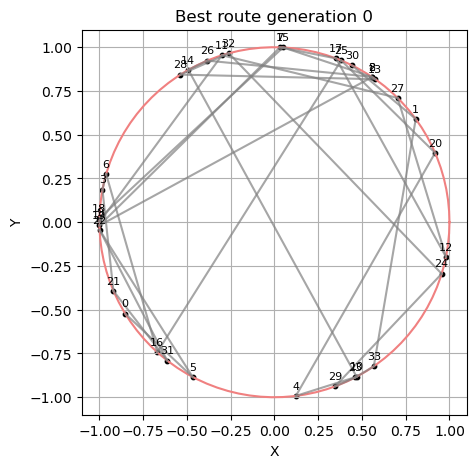

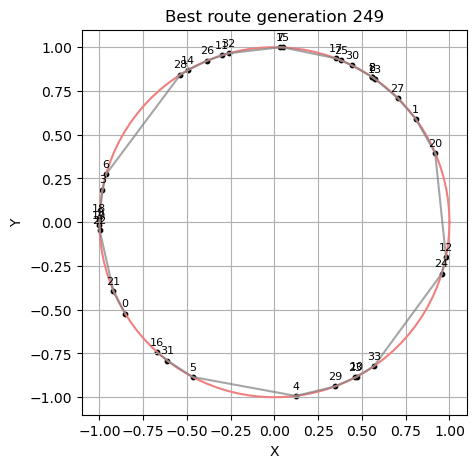

In [31]:
# Circle data visualization
data = open_data_generations("Circle")
generations = len(data)

# Print first and last generation
print_best_travel("Circle", 0, False)
print_best_travel("Circle", generations-1, False)

In [32]:
create_gif("Circle", generations)

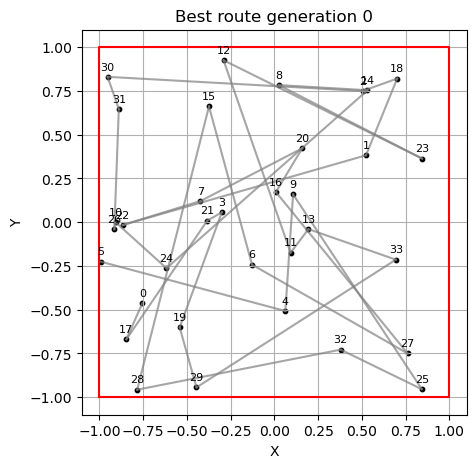

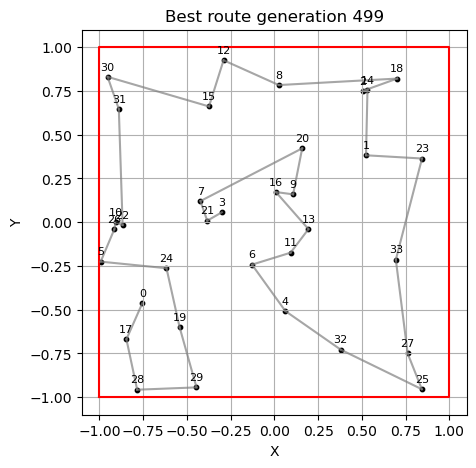

In [33]:
# Square data visualization
data = open_data_generations("Square")
generations = len(data)

# Print first and last generation
print_best_travel("Square", 0, False)
print_best_travel("Square", generations-1, False)

In [34]:
create_gif("Square", generations)

<img src="9.1/OUTPUT/Circle/fittest.gif"/> 
<img src="9.1/OUTPUT/Square/fittest.gif"/>

The side by side comparison of the first and last generation give a clear evidence that the genetic algorithm does in fact converge. It is however interesting to peek into the loss of the fittest element of the population as evolution progresses. For the circle we also have an estimate of the shortest path, i.e. the length of the circumference $2\pi$ being it a unitary circle. 

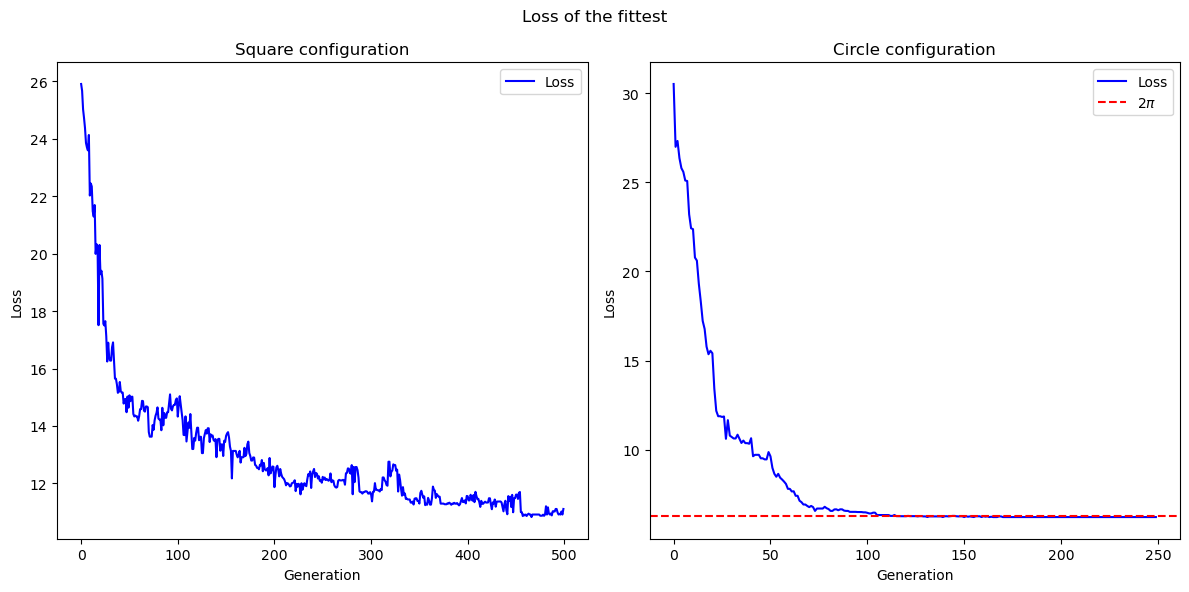

In [35]:
# Load data from file for Square
int_values_square, loss_square = np.loadtxt("./9.1/OUTPUT/Square/loss.dat", usecols=(0, 1), unpack=True)

# Load data from file for Circle
int_values_circle, loss_circle = np.loadtxt("./9.1/OUTPUT/Circle/loss.dat", usecols=(0, 1), unpack=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Loss of the fittest')

# Plot for Square
ax1.plot(int_values_square, loss_square, 'b-', label='Loss')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Loss')
ax1.set_title('Square configuration')
ax1.legend()

# Plot for Circle
ax2.plot(int_values_circle, loss_circle, 'b-', label='Loss')
ax2.axhline(y=2*np.pi, color='r', linestyle='--', label=r'$2\pi$')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Loss')
ax2.set_title('Circle configuration')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Despite having let the simulation of the square run for a longer evolution, it struggled to find the optimal path, which is not surprising given the complexity of the problem. The circle on the other hand, was able to find the optimal path in a relatively short time, which is a good sign of the efficiency of the algorithm. 